In [1]:
import os
import pandas as pd
from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.ets import AutoETS
from sktime.forecasting.base import ForecastingHorizon
from sktime.performance_metrics.forecasting import mean_squared_error
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('AirPassengers.csv', index_col=0)
df.head()

idx = pd.to_datetime(df.index).to_period('M')
df.index=idx
y = df['Passengers']

(<Figure size 1600x400 with 1 Axes>, <Axes: >)

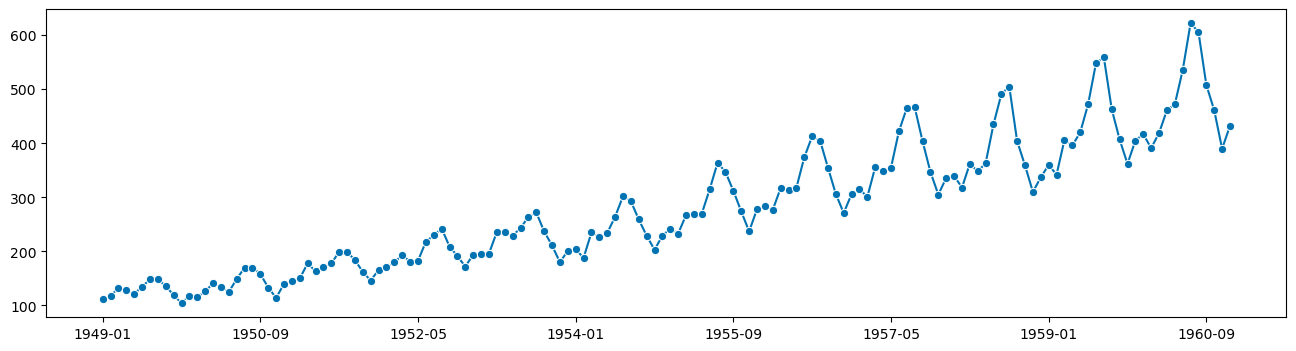

In [3]:
plot_series(df)

In [4]:
y_train, y_test = temporal_train_test_split(y,test_size=12)
print(y_train.shape, y_test.shape)

(132,) (12,)


(<Figure size 1600x400 with 1 Axes>, <Axes: >)

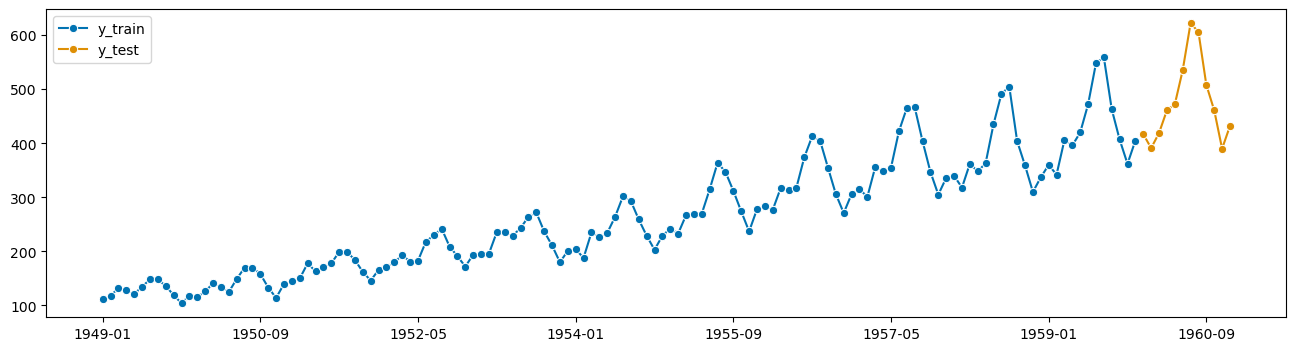

In [5]:
plot_series(y_train, y_test, labels=['y_train', 'y_test'])

Specifying a forecasting horizon

In [6]:
fh = ForecastingHorizon(y_test.index, is_relative=False)
fh

ForecastingHorizon(['1960-01', '1960-02', '1960-03', '1960-04', '1960-05', '1960-06',
             '1960-07', '1960-08', '1960-09', '1960-10', '1960-11', '1960-12'],
            dtype='period[M]', is_relative=False)

Exponential Smoothing

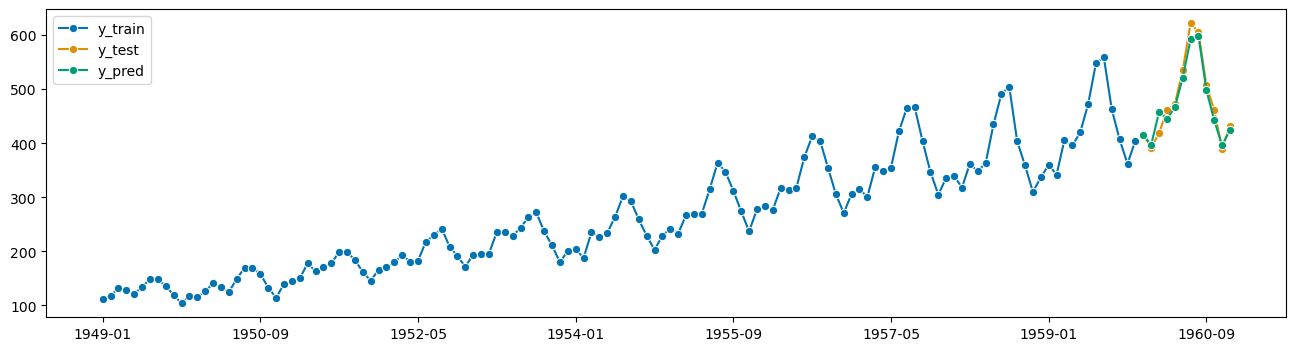

In [7]:
forecaster = ExponentialSmoothing(trend='add', seasonal='additive', sp=12)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=['y_train', 'y_test', 'y_pred'])
plt.show()

AutoETS

In [8]:
forecaster = AutoETS(auto=True, sp=1)
forecaster.fit(y_train)
print(forecaster.summary())

                                 ETS Results                                  
Dep. Variable:                      y   No. Observations:                  132
Model:                       ETS(MAN)   Log Likelihood                -614.190
Date:                Thu, 16 Nov 2023   AIC                           1238.380
Time:                        18:49:01   BIC                           1252.794
Sample:                    01-31-1949   HQIC                          1244.237
                         - 12-31-1959   Scale                            0.011
Covariance Type:               approx                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
smoothing_level     0.9999      0.106      9.434      0.000       0.792       1.208
smoothing_trend  9.999e-05        nan        nan        nan         nan         nan
initial_level     106.6583     1

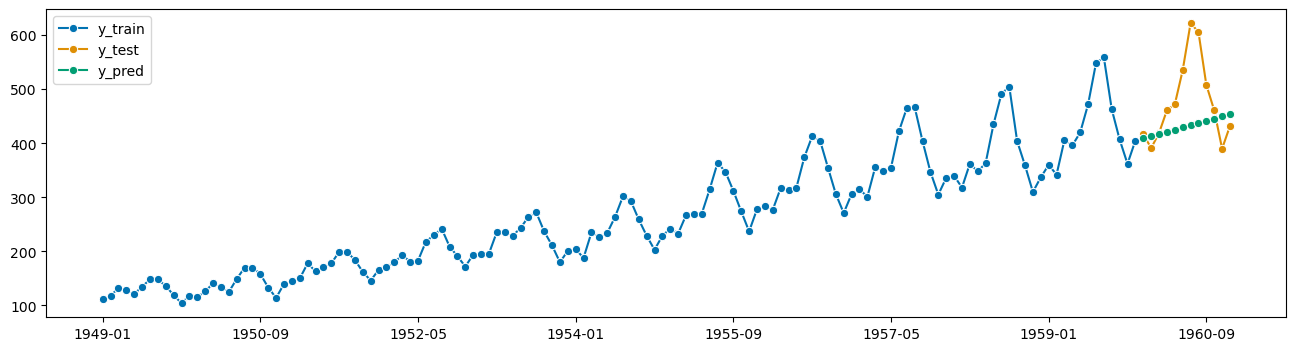

In [9]:
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=['y_train', 'y_test', 'y_pred'])
plt.show()

In [10]:
mean_squared_error(y_test, y_pred,square_root=True)

85.6185395136008